In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [95]:
import pandas as pd

def find_plateau_timestep(return_series, window=10, threshold=0.01):
    """
    Find the timestep at which the learning plateaued.

    Parameters:
        return_series (list or np.ndarray): Series of returns from the agent.
        window (int): Window size for the moving average and gradient check.
        threshold (float): Threshold for improvement to consider plateau.

    Returns:
        int: Timestep (index) where the learning plateaued, or -1 if no plateau detected.
    """
    # Convert series to a NumPy array for efficiency
    returns = np.array(return_series)
    
    # Compute the moving average to smooth the series
    smoothed = pd.Series(returns).rolling(window=window, min_periods=1).mean().values
    
    # Compute the gradient of the smoothed series
    gradient = np.gradient(smoothed)
    
    # Check the gradient over a sliding window
    for i in range(len(gradient) - window + 1):
        # Look at the gradient over the next 'window' timesteps
        if np.all(gradient[i:i + window] < threshold):
            return i  # Return the index where the plateau starts
    
    return -1  # Return -1 if no plateau is found


In [96]:
def get_metrics(path):
    metrics = json.load(open(path+"/metrics.json"))
    return metrics

def plot_metric(key, metrics, title=""):
    steps = metrics[key]["steps"]
    values = metrics[key]["values"]
    plt.plot(steps, values)
    plt.xlabel("steps")
    plt.ylabel(key)
    plt.title(title)

def plot_mean_return(metrics, title="Mean Return of all agents"):
    steps = metrics["total_return_mean"]["steps"]
    mean_return = np.array(metrics["total_return_mean"]["values"])
    window = 100
    plateau = find_plateau_timestep(mean_return, window=window, threshold=0.1)
    if plateau != -1:
        plateau_step = steps[plateau]
        plt.axvline(plateau_step, color="black", linestyle="--", label=f"Plateau at {plateau_step}")
    avg = mean_return[-window:].mean()
    plt.plot(steps, mean_return)
    plt.axhline(avg, color="red", linestyle="--", label=f"Last 100 steps avg: {avg:.2f}")
    # add avg to yticks
    yticks = plt.yticks()[0]
    yticks = np.append(yticks, avg)
    plt.yticks(yticks)
    plt.xlabel("steps")
    plt.ylabel("mean return")
    plt.title(title)
    
def plot_all_agents_mean_return(metrics, title="Mean Return per agent"):
    steps = metrics["total_return_mean"]["steps"]
    ag = 0
    while True:
        try:
            values = metrics[f"agent_{ag}_return_mean"]["values"]
        except:
            break 
        plt.plot(steps, values, label=f"Agent {ag}")
        plt.xlabel("steps")
        plt.ylabel("mean return")
        plt.title(title)
        plt.legend()
        ag += 1
        
def plot_individual_objective_per_agent(metrics, title="Individual Objective per agent"):
    steps = metrics["agent_0_objective_1_return_mean"]["steps"]
    ag = 0
    while True:
        try:
            values = metrics[f"agent_{ag}_objective_1_return_mean"]["values"]
        except:
            break 
        plt.plot(steps, values, label=f"Agent {ag}")
        plt.xlabel("steps")
        plt.ylabel("Individual return")
        plt.title(title)
        plt.legend()
        ag += 1
    
def plot_ethical_objective_per_agent(metrics, title="Ethical Objective per agent"):
    steps = metrics["agent_0_objective_0_return_mean"]["steps"]
    ag = 0
    while True:
        try:
            values = metrics[f"agent_{ag}_objective_0_return_mean"]["values"]
        except:
            break 
        plt.plot(steps, values, label=f"Agent {ag}")
        plt.xlabel("steps")
        plt.ylabel("Ethical Return")
        plt.title(title)
        plt.legend()
        ag += 1
        
def plot_combined_objectives(metrics, title="Combined Objectives"):
    steps = metrics["agent_0_objective_0_return_mean"]["steps"]
    ind_values = []
    eth_values = []
    ag = 0
    while True:
        try:
            ind_values.append(np.array(metrics[f"agent_{ag}_objective_1_return_mean"]["values"]))
            eth_values.append(np.array(metrics[f"agent_{ag}_objective_0_return_mean"]["values"]))
        except:
            break 
    
    ind_values = np.array(ind_values).mean(axis=0)
    eth_values = np.array(eth_values).mean(axis=0)
    print(eth_values.shape)
    # Plot the two objectives in subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].plot(steps, ind_values, label="Individual")
    axs[0].set_title("Individual Objective")
    axs[0].set_xlabel("steps")
    axs[0].set_ylabel("Individual Return")
    
    axs[1].plot(steps, eth_values, label="Ethical")
    axs[1].set_title("Ethical Objective")
    axs[1].set_xlabel("steps")
    axs[1].set_ylabel("Ethical Return")
    
    
        
def plot_grad_norm(metrics, tittle="Grad norm"):
    steps = metrics["agent_grad_norm"]["steps"]
    values = metrics["agent_grad_norm"]["values"]
    plt.plot(steps, values)
    plt.xlabel("steps")
    plt.ylabel("grad norm")
    plt.title(tittle)


(472,)


dict_keys(['Agent_0/lagr_multiplier_0', 'Agent_0/mean_recent_loss_0', 'Agent_1/lagr_multiplier_0', 'Agent_1/mean_recent_loss_0', 'Agent_2/lagr_multiplier_0', 'Agent_2/mean_recent_loss_0', 'Agent_3/lagr_multiplier_0', 'Agent_3/mean_recent_loss_0', 'Agent_4/lagr_multiplier_0', 'Agent_4/mean_recent_loss_0', 'advantage_mean', 'agent_0_objective_0_return_mean', 'agent_0_objective_0_return_std', 'agent_0_objective_1_return_mean', 'agent_0_objective_1_return_std', 'agent_1_objective_0_return_mean', 'agent_1_objective_0_return_std', 'agent_1_objective_1_return_mean', 'agent_1_objective_1_return_std', 'agent_2_objective_0_return_mean', 'agent_2_objective_0_return_std', 'agent_2_objective_1_return_mean', 'agent_2_objective_1_return_std', 'agent_3_objective_0_return_mean', 'agent_3_objective_0_return_std', 'agent_3_objective_1_return_mean', 'agent_3_objective_1_return_std', 'agent_4_objective_0_return_mean', 'agent_4_objective_0_return_std', 'agent_4_objective_1_return_mean', 'agent_4_objective_1

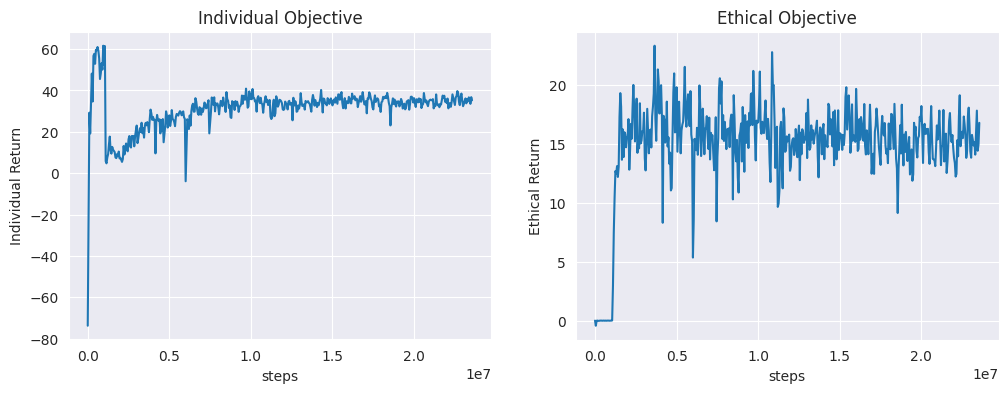

In [97]:
metrics = get_metrics("beegfs/EPyMARL/sacred/lippo_egg/MultiAgentEthicalGathering-large-mo-v1/4")
plot_combined_objectives(metrics)
metrics.keys()

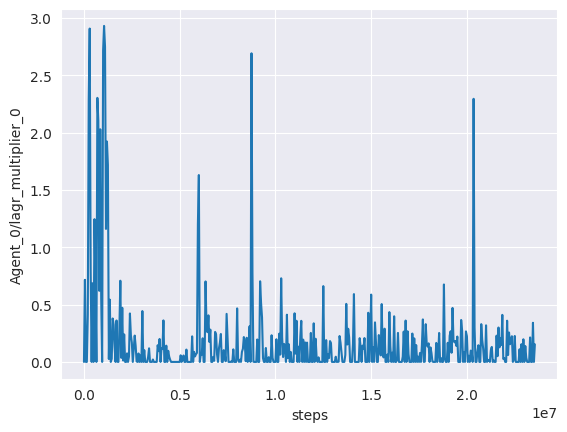

In [98]:
plot_metric("Agent_0/lagr_multiplier_0",metrics)

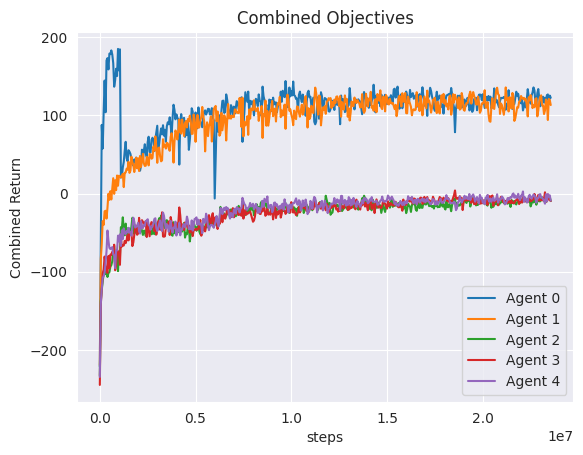

In [99]:
plot_combined_objectives_per_agent(metrics,3)

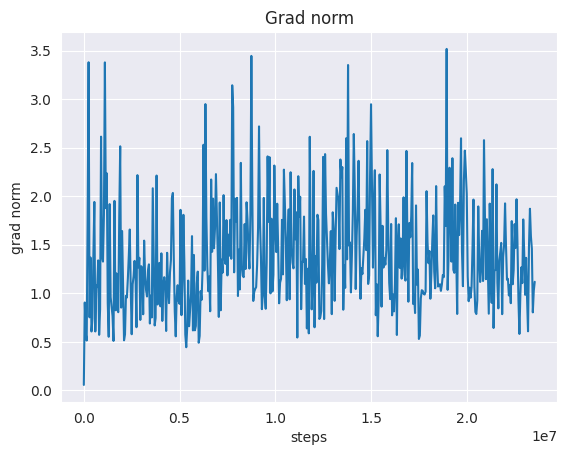

In [100]:
plot_grad_norm(metrics)